<a href="https://colab.research.google.com/github/lustraka/Data_Analysis_Workouts/blob/main/Analyse_Twitter_Data/practice-cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oral Insulin Phase II Clinical Trial Data

This project looks at the phase two clinical data of 350 patients for a new innovative oral insulin called Auralin - a proprietary capsule that can solve the stomach lining problem.

Phase two trials are intended to:
- Test the efficacy and the dose response of a drug
- Idenitify adverse reactions

In this trial, half of the patients are being treated with Auralin, and the other 175 being treated with a popular injectable insulin called Novodra. By comparing key metrics between these two drugs, we can determine if Auralin is effective.

*DISCLAIMER: This data isn't real. It was fabricated for the sake of this project.*

## Gather
This Auralin Phase II clinical trial dataset comes in three tables: `patients`, `treatments`, and `adverse_reactions`.

In [1]:
import pandas as pd
import numpy as np
path = 'https://raw.githubusercontent.com/lustraka/Data_Analysis_Workouts/main/Analyse_Twitter_Data/data/'

In [2]:
patients = pd.read_csv(path + 'patients.csv')
treatments = pd.read_csv(path + 'treatments.csv')
adverse_reactions = pd.read_csv(path + 'adverse_reactions.csv')

## Assess
(For details see [practice-assessing.ipynb](https://github.com/lustraka/Data_Analysis_Workouts/blob/main/Analyse_Twitter_Data/practice-assessing.ipynb).)
### Quality Issues
#### `patients`
- ZIP code is float not a string
- ZIP code has four digits sometimes
- Tim Neudorf height is 27 in instead of 72 in
- Full state names sometimes, abbreviations other times
- The *given_name* for the patient with the *patient_id* 9 is Dsvid instead of David
- Missing demographic information (address - contact columns)
- Erroneous datatypes (assigned_sex, state, zip_code, and birthdate columns)
- Multiple phone number formats
- Default John Doe data
- Multiple records for Jakobsen, Gersten, Taylor
- 48.8 kgs instead of lbs for Zaitseva weight

#### `treatments`
- Missing HbA1c changes
- The letter 'u' next to the start dose and end dose in the *auralin* and *novodra* columns
- Lowercase given names and surnames
- Missing records (280 instead of 350)
- Erroneous datatypes (auralin and novodra columns)
- Inaccurate HbA1c changes (4s mistaken as 9s)
- Nulls represented as dashes in auralin and novodra columns

#### `adverse_reactions`
- Lowercase given names and surnames

### Tidiness Issues
- The contact column in `patients` table should be split into phone number and e-mail.
- Three variables in two columns in `treatments` table (treatment, start dose, and end dose)
- The `adverse_reactions` table should be part of `treatments` table.
- Given name and surname columns in `patients` table duplicated in `treatments` and `adverse_reactions` tables


## Clean

In [3]:
patients_clean = patients.copy()
treatments_clean = treatments.copy()
adverse_reactions_clean = adverse_reactions.copy()

### Missing data
#### `treatments` Missing records (280 instead of 350)
##### Define
Concatenate missing `treatments` records that are stored in a file named `treatments_cut.csv`.

Reference: 
- [pd.concat](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html) for the function used in the solution.

##### Code

In [4]:
# Read  missing records
treatments_missing = pd.read_csv(path + 'treatments_cut.csv')
# Concatenate dataframes
treatments_clean = pd.concat([treatments_clean, treatments_missing], ignore_index=True)

#### Test

In [5]:
# Check shape
treatments_clean.shape

(350, 7)

#### `treatments`: Missing HbA1c changes and Inaccurate HbA1c changes (leading 4s mistaken as 9s)

##### Define
Recompute hba1c_change = hba1c_end - hba1c_start

##### Code

In [6]:
# Recompute change = start - end
treatments_clean.hba1c_change = treatments_clean.hba1c_start - treatments_clean.hba1c_end

##### Test

In [7]:
assert treatments_clean.loc[treatments_clean.hba1c_change == treatments_clean.hba1c_end - treatments_clean.hba1c_start].all().all()

### Tideness
#### Contact column in `patients` table contains two variables: phone number and e-mail
##### Define

References:
- Use regular expressions with pandas' [`str.extract` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.extract.html)
- Here is an amazing [regex tutorial](https://regexone.com/)
- [Various phone number regex patterns](https://stackoverflow.com/questions/16699007/regular-expression-to-match-standard-10-digit-phone-number)
- [E-mail address regex pattern](http://emailregex.com/), which you might need to modify to distinguish the email from the phone number.

##### Code


In [8]:
# Extract phone numbers
patients_clean['phone_number'] = patients_clean.contact.str.extract('((?:\+\d{1,2}\s)?\(?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4})')

# [a-zA-Z] to signify emails in this dataset all start and end with letters
patients_clean['email'] = patients_clean.contact.str.extract('([a-zA-Z][a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+[a-zA-Z])', expand=True)

# Drop the original contact column
patients_clean = patients_clean.drop('contact', axis=1)

##### Test

In [9]:
patients_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id    503 non-null    int64  
 1   assigned_sex  503 non-null    object 
 2   given_name    503 non-null    object 
 3   surname       503 non-null    object 
 4   address       491 non-null    object 
 5   city          491 non-null    object 
 6   state         491 non-null    object 
 7   zip_code      491 non-null    float64
 8   country       491 non-null    object 
 9   birthdate     503 non-null    object 
 10  weight        503 non-null    float64
 11  height        503 non-null    int64  
 12  bmi           503 non-null    float64
 13  phone_number  491 non-null    object 
 14  email         491 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 59.1+ KB


In [10]:
patients_clean.phone_number.sample(25)

471         503-417-1995
202         503-820-7877
248         308-496-7837
41          320-826-3340
332         615 755 8235
101         417-738-5084
220    +1 (707) 896-9250
120         415-676-8818
371    +1 (908) 287-7099
15          276-225-1955
282         304-438-2648
141         903-644-2098
188         212 201 3108
27          985-814-7603
212         704-805-5094
493    +1 (208) 388-1065
18          406-775-2696
372         618-346-3914
136         714-507-4204
207         989-936-4563
324         202-238-2247
162         916-555-7247
322         254-546-2728
500         816-223-6007
491         210-222-8684
Name: phone_number, dtype: object

In [11]:
# Confirm that no emails start with an integer (regex didn't match for this)
patients_clean.email.sort_values().head()

404               AaliyahRice@dayrep.com
11          Abdul-NurMummarIsa@rhyta.com
332                AbelEfrem@fleckens.hu
258              AbelYonatan@teleworm.us
305    AddolorataLombardi@jourrapide.com
Name: email, dtype: object

#### Three variables in two columns in `treatments` table (treatment, start dose and end dose)
##### Define

To reshape columns (auralin, novodra) $\to$ (treatment, start_dose, end_dose) 
- Melt the auralin and novodra columns to a treatment and a dose column (dose will still contain both start and end dose at this point). 
- Then split the dose column on ' - ' to obtain start_dose and end_dose columns. 
- Drop the intermediate dose column.

References:
- Use pandas' [melt function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html) and [`str.split()` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.split.html). 
- Here is an excellent [`melt` tutorial](https://deparkes.co.uk/2016/10/28/reshape-pandas-data-with-melt/).

##### Code


In [12]:
treatments_clean = treatments_clean.melt(id_vars=['given_name', 'surname', 'hba1c_start', 'hba1c_end', 'hba1c_change'], var_name='treatment', value_name='dose').query('dose != "-"')
treatments_clean['dose_start'], treatments_clean['dose_end'] = treatments_clean.dose.str.split(' - ', 1).str
treatments_clean = treatments_clean.drop('dose', axis=1) # OR treats_new.drop(columns='dose')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


##### Test

In [13]:
treatments_clean.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u,48u
3,skye,gormanston,7.97,7.62,0.35,auralin,33u,36u
6,sophia,haugen,7.65,7.27,0.38,auralin,37u,42u
7,eddie,archer,7.89,7.55,0.34,auralin,31u,38u
9,asia,woźniak,7.76,7.37,0.39,auralin,30u,36u


####  Adverse reaction should be part of the `treatments` table
##### Define

##### Code
Merge the *adverse_reaction* column to the `treatments` table, joining on *given name* and *surname*.

In [14]:
treatments_clean = pd.merge(treatments_clean, adverse_reactions_clean, on=['given_name', 'surname'], how='left')

##### Test

In [15]:
treatments_clean

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u,48u,NaN
1,skye,gormanston,7.97,7.62,0.35,auralin,33u,36u,NaN
2,sophia,haugen,7.65,7.27,0.38,auralin,37u,42u,NaN
3,eddie,archer,7.89,7.55,0.34,auralin,31u,38u,NaN
4,asia,woźniak,7.76,7.37,0.39,auralin,30u,36u,NaN
...,...,...,...,...,...,...,...,...,...
345,christopher,woodward,7.51,7.06,0.45,novodra,55u,51u,nausea
346,maret,sultygov,7.67,7.30,0.37,novodra,26u,23u,NaN
347,lixue,hsueh,9.21,8.80,0.41,novodra,22u,23u,injection site discomfort
348,jakob,jakobsen,7.96,7.51,0.45,novodra,28u,26u,hypoglycemia


#### Given name and surname columns in `patients` table duplicated in `treatments` and `adverse_reactions` tables  and Lowercase given names and surnames

##### Define
- Adverse reactions table is no longer needed so ignore that part. 
- Isolate the patient ID and names in the `patients` table.
- Then convert these names to lower case to join with `treatments`. 
- Then drop the given name and surname columns in the `treatments` table (so these being lowercase isn't an issue anymore).

##### Code


In [16]:
id_names = patients_clean[['patient_id', 'given_name', 'surname']]
id_names.given_name = id_names.given_name.str.lower()
id_names.surname = id_names.surname.str.lower()
treatments_clean = pd.merge(treatments_clean, id_names, on=['given_name', 'surname'])
treatments_clean = treatments_clean.drop(['given_name', 'surname'], axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


##### Test

In [17]:
# Confirm the merge was executed correctly
treatments_clean

,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction,patient_id
0,7.63,7.20,0.43,auralin,41u,48u,NaN,225
1,7.97,7.62,0.35,auralin,33u,36u,NaN,242
2,7.65,7.27,0.38,auralin,37u,42u,NaN,345
3,7.89,7.55,0.34,auralin,31u,38u,NaN,276
4,7.76,7.37,0.39,auralin,30u,36u,NaN,15
...,...,...,...,...,...,...,...,...
344,7.51,7.06,0.45,novodra,55u,51u,nausea,153
345,7.67,7.30,0.37,novodra,26u,23u,NaN,420
346,9.21,8.80,0.41,novodra,22u,23u,injection site discomfort,336
347,7.96,7.51,0.45,novodra,28u,26u,hypoglycemia,25


In [18]:
# Patient ID should be the only duplicate column
all_columns = pd.Series(list(patients_clean) + list(treatments_clean))
all_columns[all_columns.duplicated()]

22    patient_id
dtype: object

### Quality
#### Zip code is a float not a string and Zip code has four digits sometimes
##### Define
- Convert the zip code column's data type from a float to a string using astype, 
- remove the '.0' using string slicing, and 
- pad four digit zip codes with a leading 0.

##### Code


In [19]:
patients_clean.zip_code = patients_clean.zip_code.astype(str).str[:-2].str.pad(5, fillchar='0')
# Reconvert NaNs entries that were converted to '0000n' by code above
patients_clean.zip_code = patients_clean.zip_code.replace('0000n', np.nan)

##### Test

In [20]:
patients_clean.zip_code.head()

0    92390
1    61812
2    68467
3    07095
4    36303
Name: zip_code, dtype: object

#### Tim Neudorf height is 27 in instead of 72 in
##### Define
Replace height for rows in the `patients` table that have a height of 27 in (there is only one) with 72 in.
##### Code


In [21]:
patients_clean.height = patients_clean.height.replace(27, 72)

##### Test

In [22]:
# Should be empty
patients_clean[patients_clean.height == 27]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email


In [23]:
# Confirm the replacement worked
patients_clean[patients_clean.surname == 'Neudorf']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303,United States,2/18/1928,192.3,72,26.1,334-515-7487,TimNeudorf@cuvox.de


#### Full state names sometimes, abbreviations other times
##### Define
Apply a function that converts full state name to state abbreviation for California, New York, Illinois, Florida, and Nebraska.

Reference:
-  [Tutorial](https://chrisalbon.com/python/pandas_apply_operations_to_dataframes.html) for method used in solution.

##### Code


In [24]:
patients_clean.state.unique()

array(['California', 'Illinois', 'Nebraska', 'NJ', 'AL', 'Florida', 'NV',
       'CA', 'MO', 'New York', 'MI', 'TN', 'VA', 'OK', 'GA', 'MT', 'MA',
       'NY', 'NM', 'IL', 'LA', 'PA', 'CO', 'ME', 'WI', 'SD', 'MN', 'FL',
       'WY', 'OH', 'IA', 'NC', 'IN', 'CT', 'KY', 'DE', 'MD', 'AZ', 'TX',
       'NE', 'AK', 'ND', 'KS', 'MS', 'WA', 'SC', 'WV', 'RI', 'NH', 'OR',
       nan, 'VT', 'ID', 'DC', 'AR'], dtype=object)

In [25]:
# Mapping from full state name to abbreviation
state_abbrev = {'California': 'CA',
                'New York': 'NY',
                'Illinois': 'IL',
                'Florida': 'FL',
                'Nebraska': 'NE'}

# Function to apply
def abbreviate_state(patient):
    if patient['state'] in state_abbrev.keys():
        abbrev = state_abbrev[patient['state']]
        return abbrev
    else:
        return patient['state']
    
patients_clean['state'] = patients_clean.apply(abbreviate_state, axis=1)

##### Test

In [26]:
patients_clean.state.value_counts()

CA    60
NY    47
TX    32
IL    24
MA    22
FL    22
PA    18
GA    15
OH    14
MI    13
LA    13
OK    13
NJ    12
VA    11
MS    10
WI    10
AL     9
IN     9
TN     9
MN     9
NC     8
WA     8
KY     8
MO     7
KS     6
ID     6
NV     6
NE     6
IA     5
SC     5
CT     5
AZ     4
RI     4
ME     4
ND     4
CO     4
AR     4
OR     3
MD     3
DE     3
SD     3
WV     3
MT     2
VT     2
DC     2
WY     1
NM     1
NH     1
AK     1
Name: state, dtype: int64

#### Dsvid Gustafsson
##### Define
Replace given name for rows in the `patients` table that have a given name of 'Dsvid' with 'David'.
##### Code


In [27]:
patients_clean.given_name = patients_clean.given_name.replace('Dsvid', 'David')

##### Test

In [28]:
patients_clean[patients_clean.surname == 'Gustafsson']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
8,9,male,David,Gustafsson,1790 Nutter Street,Kansas City,MO,64105,United States,3/6/1937,163.9,66,26.5,816-265-9578,DavidGustafsson@armyspy.com


#### Erroneous datatypes (assigned sex, state, zip_code, and birthdate columns) and Erroneous datatypes (auralin and novodra columns) and The letter 'u' in starting and ending doses for Auralin and Novodra
##### Define
- Convert assigned sex and state to categorical data types. 
- Zip code data type was already addressed above. 
- Convert birthdate to datetime data type. 
- Strip the letter 'u' in start dose and end dose and convert those columns to data type integer.

References:
- [pandas.Series.astype](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.astype.html) 
- [pandas.to_datetime](http://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.to_datetime.html)
- [pandas.Series.str.strip](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.strip.html)

##### Code


In [29]:
# To category
patients_clean.assigned_sex = patients_clean.assigned_sex.astype('category')
patients_clean.state = patients_clean.state.astype('category')

# To datetime
patients_clean.birthdate = pd.to_datetime(patients_clean.birthdate)

# Strip u and to integer
treatments_clean.dose_start = treatments_clean.dose_start.str.strip('u').astype(int)
treatments_clean.dose_end = treatments_clean.dose_end.str.strip('u').astype(int)

##### Test

In [30]:
patients_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   patient_id    503 non-null    int64         
 1   assigned_sex  503 non-null    category      
 2   given_name    503 non-null    object        
 3   surname       503 non-null    object        
 4   address       491 non-null    object        
 5   city          491 non-null    object        
 6   state         491 non-null    category      
 7   zip_code      491 non-null    object        
 8   country       491 non-null    object        
 9   birthdate     503 non-null    datetime64[ns]
 10  weight        503 non-null    float64       
 11  height        503 non-null    int64         
 12  bmi           503 non-null    float64       
 13  phone_number  491 non-null    object        
 14  email         491 non-null    object        
dtypes: category(2), datetime64[ns](1), float

In [31]:
treatments_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hba1c_start       349 non-null    float64
 1   hba1c_end         349 non-null    float64
 2   hba1c_change      349 non-null    float64
 3   treatment         349 non-null    object 
 4   dose_start        349 non-null    int64  
 5   dose_end          349 non-null    int64  
 6   adverse_reaction  35 non-null     object 
 7   patient_id        349 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 24.5+ KB


#### Multiple phone number formats
##### Define
Strip all " ", "-", "(", ")", and "+" and store each number without any formatting. Pad the phone number with a 1 if the length of the number is 10 digits (we want country code).

Reference:
- Helpful [Stack Overflow answer](https://stackoverflow.com/a/123681)
##### Code


In [32]:
patients_clean.phone_number.head()

0         951-719-9170
1    +1 (217) 569-3204
2         402-363-6804
3    +1 (732) 636-8246
4         334-515-7487
Name: phone_number, dtype: object

In [33]:
patients_clean.phone_number = patients_clean.phone_number.str.replace(r'\D+', '').str.pad(11, fillchar='1')

##### Test

In [34]:
patients_clean.phone_number.head()

0    19517199170
1    12175693204
2    14023636804
3    17326368246
4    13345157487
Name: phone_number, dtype: object

####  Default John Doe data
##### Define
Remove the non-recoverable John Doe records from the `patients` table.

(Recall that it is assumed that the data that this John Doe data displaced is not recoverable.)
##### Code


In [35]:
patients_clean = patients_clean[patients_clean.surname != 'Doe']

##### Test

In [36]:
# Should be no Doe records
patients_clean.surname.value_counts()

Jakobsen       3
Taylor         3
Aranda         2
Cabrera        2
Dratchev       2
              ..
Russo          1
Onyekaozulu    1
Murakami       1
Morita         1
Martinsen      1
Name: surname, Length: 465, dtype: int64

In [37]:
# Should be no 123 Main Street records
patients_clean.address.value_counts()

648 Old Dear Lane        2
2476 Fulton Street       2
2778 North Avenue        2
2335 Webster Street      1
3072 Braxton Street      1
                        ..
4839 North Avenue        1
945 Maple Avenue         1
2566 Ingram Street       1
1368 Yorkshire Circle    1
4236 Beech Street        1
Name: address, Length: 482, dtype: int64

#### Multiple records for Jakobsen, Gersten, Taylor
##### Define
Remove the Jake Jakobsen, Pat Gersten, and Sandy Taylor rows from the patients table. These are the nicknames, which happen to also not be in the treatments table (removing the wrong name would create a consistency issue between the patients and treatments table). These are all the second occurrence of the duplicate. These are also the only occurences of non-null duplicate addresses.
##### Code


In [38]:
# tilde means not: http://pandas.pydata.org/pandas-docs/stable/indexing.html#boolean-indexing
patients_clean = patients_clean[~((patients_clean.address.duplicated()) & patients_clean.address.notnull())]

##### Test

In [39]:
patients_clean[patients_clean.surname == 'Jakobsen']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
24,25,male,Jakob,Jakobsen,648 Old Dear Lane,Port Jervis,NY,12771,United States,1985-08-01,155.8,67,24.4,18458587707,JakobCJakobsen@einrot.com
432,433,female,Karen,Jakobsen,1690 Fannie Street,Houston,TX,77020,United States,1962-11-25,185.2,67,29.0,19792030438,KarenJakobsen@jourrapide.com


In [40]:
patients_clean[patients_clean.surname == 'Gersten']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
97,98,male,Patrick,Gersten,2778 North Avenue,Burr,NE,68324,United States,1954-05-03,138.2,71,19.3,14028484923,PatrickGersten@rhyta.com


In [41]:
patients_clean[patients_clean.surname == 'Taylor']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
131,132,female,Sandra,Taylor,2476 Fulton Street,Rainelle,WV,25962,United States,1960-10-23,206.1,64,35.4,13044382648,SandraCTaylor@dayrep.com
426,427,male,Rogelio,Taylor,4064 Marigold Lane,Miami,FL,33179,United States,1992-09-02,186.6,69,27.6,13054346299,RogelioJTaylor@teleworm.us


#### kgs instead of lbs for Zaitseva weight
##### Define
Use [advanced indexing](https://stackoverflow.com/a/44913631) to isolate the row where the surname is Zaitseva and convert the entry in its weight field from kg to lbs.
##### Code
```python
weight_kg = patients_clean.weight.min()
mask = patients_clean.surname == 'Zaitseva'
column_name = 'weight'
patients_clean.loc[mask, column_name] = weight_kg * 2.20462
```


In [42]:
weight_kg = patients_clean.weight.min()
weight_kg_idx = patients_clean.weight.idxmin()
patients_clean.at[weight_kg_idx, 'weight'] = weight_kg * 2.20462

##### Test

In [43]:
patients_clean.at[weight_kg_idx, 'weight']

107.58545599999998

## Analysis & Visualization

In [44]:
treatments_clean.head()

,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction,patient_id
0,7.63,7.20,0.43,auralin,41,48,NaN,225
1,7.97,7.62,0.35,auralin,33,36,NaN,242
2,7.65,7.27,0.38,auralin,37,42,NaN,345
3,7.89,7.55,0.34,auralin,31,38,NaN,276
4,7.76,7.37,0.39,auralin,30,36,NaN,15


In [45]:
# Compare adverse reactions
treatments_clean.groupby(by=['treatment','adverse_reaction'])['adverse_reaction'].count()

treatment  adverse_reaction         
auralin    cough                         1
           headache                      1
           hypoglycemia                 10
           nausea                        1
           throat irritation             2
novodra    cough                         1
           headache                      2
           hypoglycemia                 10
           injection site discomfort     6
           nausea                        1
Name: adverse_reaction, dtype: int64

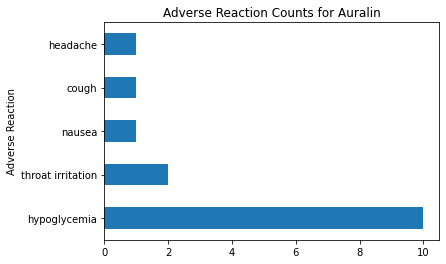

In [46]:
treatments_clean.query('treatment == "auralin"')['adverse_reaction'].value_counts().plot(kind='barh', 
                        title='Adverse Reaction Counts for Auralin', xlabel='Adverse Reaction');

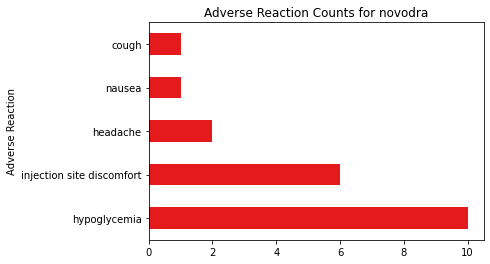

In [47]:
treatments_clean.query('treatment == "novodra"')['adverse_reaction'].value_counts().plot(kind='barh', 
                        title='Adverse Reaction Counts for novodra', xlabel='Adverse Reaction', colormap='Set1');

In [48]:
# Pre-trial Post-trial Mean Insulin Dose Change
treatments_clean['dose_change'] = treatments_clean.dose_start - treatments_clean.dose_end

In [49]:
treatments_clean.groupby(by='treatment')['dose_change'].mean()

treatment
auralin   -8.325714
novodra    0.385057
Name: dose_change, dtype: float64

In [50]:
# HbA1c Change
treatments_clean.groupby(by='treatment')['hba1c_change'].mean()

treatment
auralin    0.387657
novodra    0.404713
Name: hba1c_change, dtype: float64